# Homework 3: SVMs and Feature Selection
### Due Tuesday Feb 12 5 PM

In this assignment, we use the UCI spam email database (https://archive.ics.uci.edu/ml/datasets/Spambase) and analyse it using SVMs. As Python is our language of choice, we will be using the "scikit-learn" package which includes SVM functionality. 

Referencing:
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array
https://stackoverflow.com/questions/6710684/remove-one-column-for-a-numpy-array

## Experiment 1: Linear SVM


In [141]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import (classification_report, confusion_matrix,
roc_curve, auc, accuracy_score, precision_score, recall_score)

In [142]:
#Load Data
spamdata = pd.read_csv("spambase.data", header = None)

spamdata.head()
spam = spamdata.values #to numpy matrix
print(spam.shape)
print(spam[0,:])

#split data from labels
data = spam[:,:-1] 
label = spam[:,-1]

#print(data.shape)
#print(label.shape)
#print(sum(label)) #1813 / 4601 spam labels

(4601, 58)
[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [143]:
# ******PREPROCESSING **********************************
#Split training/test data
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.50, stratify = label) 

#Scale data by training set
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#print(X_train_scaled[0,:])
#print(X_test_scaled[0,:])

In [144]:
#*** TRAINING ******************************
 
svclassifier = SVC(kernel='linear') #linear SVC is faster

svclassifier.fit(X_train_scaled, y_train)

y_pred = svclassifier.predict(X_test_scaled)
y_score = svclassifier.decision_function(X_test_scaled)
#print(sum(y_pred))

In [145]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
#metrics.accuracy_score, precision_score, recall_score
#https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
print("accuracy "+ str(accuracy_score(y_test, y_pred)))
print("precision "+ str(precision_score(y_test, y_pred)))
print("recall "+ str(recall_score(y_test, y_pred)))

[[1305   89]
 [  92  815]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1394
         1.0       0.90      0.90      0.90       907

   micro avg       0.92      0.92      0.92      2301
   macro avg       0.92      0.92      0.92      2301
weighted avg       0.92      0.92      0.92      2301

accuracy 0.9213385484571925
precision 0.9015486725663717
recall 0.898566703417861


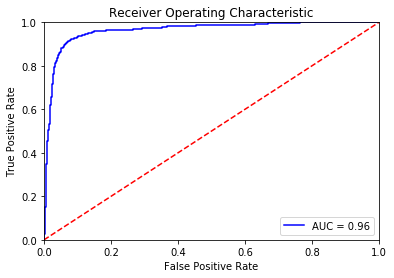

In [146]:
# ROC Plot
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
#https://stackoverflow.com/questions/38862419/how-to-plot-an-roc-curve-for-binary-valued-scores-using-scikit-learn
    
fpr, tpr, threshold = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Experiment 2: Feature Selection

Using the learned model from experiment 1, we then select the m features (2...57) with the highest |w_m| values, and train a linear SVM with only the selected features.

https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.argsort.html

In [147]:
weights = svclassifier.coef_
#print(weights)
w_orig = np.absolute(svclassifier.coef_) #absolute value for distance from 0
w_argsort = np.argsort(w_orig) #max first
w_argsort = w_argsort[0][::-1] #by reversing sort
print("reverse argsort of abs(weights):")
print(w_argsort)

reverse argsort of abs(weights):
[26 24 45 55 54 52 41 40 29 15 31 44 33 28  6 22 51 25 46 16 47 43 30 38
 14  4 37 20 56  3 35 27 39 18 32  7 48 53 11 21  8 23  5  0 34 10 17  9
 19 49 42 36 13  2  1 50 12]


In [148]:
#split data from label
#data = spam[:,:-1] 
label = spam[:,-1]
n_feat = 57

a = spam[:,w_argsort[0]] #start with top value
a = a.reshape(-1,1)
print(a.shape)
acc = []
for m in range(2,n_feat+1): #2 to 57
    b = spam[:,w_argsort[m-1]].reshape(-1,1)
    a = np.concatenate((a, b), axis=1)
    #print(a.shape)
    #print(sum(a[:,0]), sum(a[:,1]))

    data = a
    
    # ******PREPROCESSING **********************************
    #Split training/test data
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.50, stratify = label) 

    #Scale data by training set
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #*** TRAINING ******************************
    svclassifier = SVC(kernel='linear') #linear SVC is faster
    svclassifier.fit(X_train_scaled, y_train)

    y_pred = svclassifier.predict(X_test_scaled)
    #y_score = svclassifier.decision_function(X_test_scaled)

    acc.append(accuracy_score(y_test, y_pred))
print(acc)

(4601, 1)
[0.6870925684485006, 0.7435897435897436, 0.7740112994350282, 0.8026944806605824, 0.8465884398087787, 0.8422425032594524, 0.8522381573229031, 0.8609300304215558, 0.8809213385484572, 0.8857018687527162, 0.8791829639287266, 0.8813559322033898, 0.877444589308996, 0.9013472403302912, 0.8974358974358975, 0.9143850499782703, 0.9117774880486745, 0.9091699261190787, 0.9126466753585397, 0.9230769230769231, 0.9030856149500217, 0.9109083007388092, 0.9182963928726641, 0.9187309865275967, 0.9165580182529335, 0.9204693611473272, 0.9209039548022598, 0.9187309865275967, 0.924380704041721, 0.9143850499782703, 0.9213385484571925, 0.9169926119078662, 0.9278574532811821, 0.9161234245980009, 0.9182963928726641, 0.9269882659713168, 0.9261190786614515, 0.9230769230769231, 0.9217731421121251, 0.9265536723163842, 0.930465015210778, 0.9343763581051716, 0.9278574532811821, 0.9348109517601043, 0.9374185136897001, 0.9326379834854411, 0.9248152976966536, 0.930465015210778, 0.9295958279009127, 0.92481529769

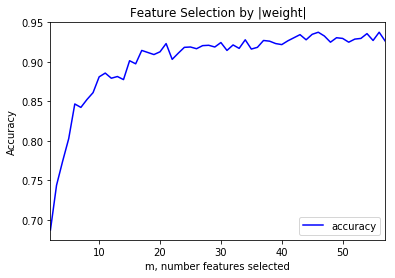

In [149]:
x_vals = range(2,n_feat+1)
plt.title('Feature Selection by |weight|')
plt.plot(x_vals, acc, 'b', label = 'accuracy')
plt.legend(loc = 'lower right')

plt.xlim([2, n_feat])
plt.ylabel('Accuracy')
plt.xlabel('m, number features selected')
plt.show()

## Experiment 2 Discussion

The highest |weights| were of index "26 24 40 55 45", corresponding to "george, hp, cs, longest-capital-run-length, and edu". These make sense as having high weight magnitudes, as "edu" would commonly be associated with school emails, and be less likely to be a spam domain, while something like capital letters would be highly weighted towards the spam side, as many spam emails enjoy capital text to grab the victim's attention.

From our "accuracy vs m" graph above, we can see that the usage of the top 2 weights already gets us to almost 70% accuracy. From there, each additional feature selected increases the overall accuracy by a significant amount up until around 20 features at approximately 91%. The rest of the features from 20 to 57 combined only increase the accuracy by 1-2%, and are much less significant than the first 20 or so. This suggests using feature selection is a good way to shrink the dataset and speed up calculations, while maintaining the bulk of the accuracy score.


# Experiment 3: Random Feature Selection

Similar to experiment 2, we select m number of features from 2 to 57, but without basing our selection on the weight values. Instead, at each iteration, we add one of the unused features from the pool randomly to our dataset, until we have the entire set again at the end.

random indicies:
[55, 32, 30, 47, 31, 43, 3, 5, 1, 51, 22, 8, 20, 50, 17, 42, 34, 38, 39, 48, 19, 6, 4, 35, 7, 52, 40, 18, 14, 0, 23, 2, 10, 53, 54, 27, 12, 37, 49, 44, 16, 36, 26, 28, 13, 15, 41, 21, 46, 56, 33, 24, 45, 29, 9, 25, 11]
(4601, 1)
[0.7331594958713603, 0.7318557149065623, 0.7466318991742721, 0.7453281182094741, 0.7405475880052151, 0.7453281182094741, 0.757496740547588, 0.7714037375054325, 0.8152976966536288, 0.8300738809213386, 0.8213820078226858, 0.8622338113863538, 0.8444154715341156, 0.8531073446327684, 0.8548457192524989, 0.8570186875271621, 0.8626684050412864, 0.8570186875271621, 0.8600608431116906, 0.8548457192524989, 0.8704910908300739, 0.8783137766188613, 0.8870056497175142, 0.8748370273794003, 0.8796175575836592, 0.9043893959148196, 0.8939591481964363, 0.8891786179921773, 0.8935245545415037, 0.8930899608865711, 0.894393741851369, 0.8983050847457628, 0.8996088657105606, 0.8926553672316384, 0.8922207735767058, 0.9030856149500217, 0.8956975228161669, 0.8956975228161

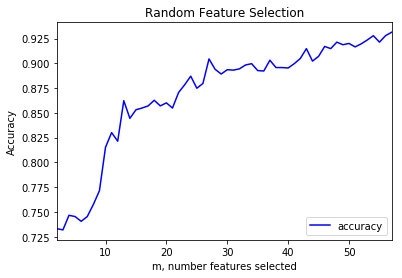

In [150]:
from random import shuffle
rand_ind = list(range(0,57))
shuffle(rand_ind)
print("random indicies:")
print(rand_ind)

label = spam[:,-1]
n_feat = 57

a = spam[:,rand_ind[0]] #start with top value
a = a.reshape(-1,1)
print(a.shape)
acc = []
for m in range(2,n_feat+1): #2 to 57
    b = spam[:,rand_ind[m-1]].reshape(-1,1)
    a = np.concatenate((a, b), axis=1)
    #print(a.shape)
    #print(sum(a[:,0]), sum(a[:,1]))

    data = a
    
    # ******PREPROCESSING **********************************
    #Split training/test data
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.50, stratify = label) 

    #Scale data by training set
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #*** TRAINING ******************************
    svclassifier = SVC(kernel='linear') #linear SVC is faster?
    svclassifier.fit(X_train_scaled, y_train)

    y_pred = svclassifier.predict(X_test_scaled)
    #y_score = svclassifier.decision_function(X_test_scaled)

    acc.append(accuracy_score(y_test, y_pred))
print(acc)

x_vals = range(2,n_feat+1)
plt.title('Random Feature Selection')
plt.plot(x_vals, acc, 'b', label = 'accuracy')
plt.legend(loc = 'lower right')

plt.xlim([2, n_feat])
plt.ylabel('Accuracy')
plt.xlabel('m, number features selected')
plt.show()

## Experiment 3 Discussion

While the random feature selection still manages to shoot up to ~80% accuracy within 10 features or so over multiple runs, it does not converge quickly towards the final value as our weighted feature selection did in experiment 2. After the large initial spike, the plot moves in a linear fashion towards the final value of ~93%. This suggests the randomness has significant features interspaced by less significant features, resulting in a gradual increase, rather than having all our significant features in the beginning as in experiment 2, which resulted in a more logarithmic curve.